In [12]:
import numpy as np 
import pandas as pd 
import torch 
import tensorflow as tf 
from numpy import argmax
import matplotlib.pyplot as plt



In [13]:
data=pd.read_csv('IRIS.csv')
#data=pd.get_dummies(data,columns=['species'])
df=data
species = dict(zip(list(df['species'].unique()), ([0, 1, 2])))
df['species'].replace(species,inplace=True)

In [14]:
y=df.pop('species')
x=df.values

In [15]:
#y=np.array([y]).reshape((len(y),1))
#y.shape

In [16]:

x_torch=torch.tensor(np.array(x),dtype=torch.float32)
y_torch=torch.tensor(np.array(y),dtype=torch.long)


In [17]:
class torchModel(torch.nn.Module):
    def __init__(self,input_dim,units=3):
        super(torchModel,self).__init__()
        self.linear=torch.nn.Linear(input_dim,units)
        self.relu=torch.nn.Softmax()
    def __call__(self,xb):
        return self.relu(self.linear(xb))
        
       



In [18]:
model=torchModel(x_torch.shape[1])
loss=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.05)

In [19]:
y_pred=model(x_torch)



/tmp/ipykernel_12316/1043456756.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.relu(self.linear(xb))


In [20]:
def calc_accuracy(y_pred,y_torch):
    return (torch.argmax(y_pred,dim=1)==y_torch).float().sum()/len(y_torch)

In [23]:
def fit(num_epochs=100):

    j_hist=[]
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred=model(x_torch)
        train_loss=loss(y_pred,y_torch)
        train_loss.backward()
        optimizer.step()
        acc=calc_accuracy(y_pred,y_torch)
        j_hist.append((train_loss.item(),acc))
        if epoch%10==0:
            print('epoch {} train loss {:.4f} and accuracy {:.4f}'.format(epoch,train_loss.detach().numpy(),acc))

    return np.array(j_hist)        

/tmp/ipykernel_12316/1043456756.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.relu(self.linear(xb))


epoch 0 train loss 1.1508 and accuracy 0.3333
epoch 10 train loss 0.9037 and accuracy 0.6667
epoch 20 train loss 0.8143 and accuracy 0.6733
epoch 30 train loss 0.7676 and accuracy 0.8733
epoch 40 train loss 0.7345 and accuracy 0.9733
epoch 50 train loss 0.7099 and accuracy 0.9667
epoch 60 train loss 0.6914 and accuracy 0.9733
epoch 70 train loss 0.6769 and accuracy 0.9667
epoch 80 train loss 0.6653 and accuracy 0.9733
epoch 90 train loss 0.6558 and accuracy 0.9733


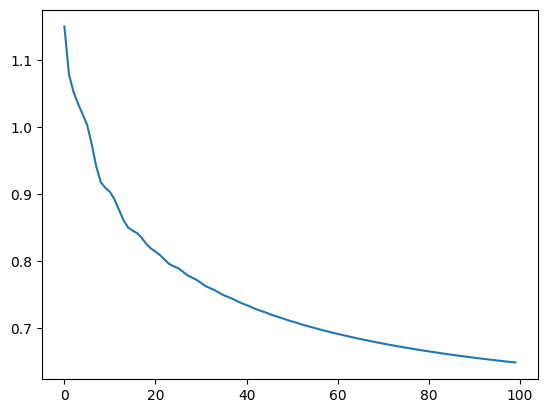

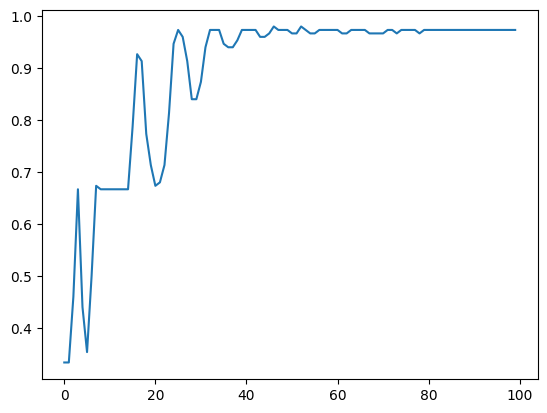

In [24]:
j_hsitory=fit(num_epochs=100)
plt.plot(j_hsitory[:,0])
plt.show()
plt.plot(j_hsitory[:,1])

#Tensorflow 

Tensorflwo Sequential API